参考リンク
- [awesome-prml](https://github.com/tsg-ut/awesome-prml-ja)
- [ベイズ統計と従来の統計の違いが超分かりやすい](https://www.slideshare.net/KunihiroHisatsune/ss-83984674)
- [ベイズの基本的なサンプル](https://qiita.com/ksksk/items/be0ce9f3975dbf7a3b17)

In [55]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
prior [0.01 0.07 0.1  0.12 0.13 0.14 0.13 0.12 0.1  0.07 0.01]
likelihood [0.    0.    0.004 0.032 0.07  0.154 0.236 0.369 0.403 0.354 0.   ]
posterior 
[0.      0.      0.0004  0.00384 0.0091  0.02156 0.03068 0.04428 0.0403
 0.02478 0.     ]
posterior regulated 
0.9999999999999999


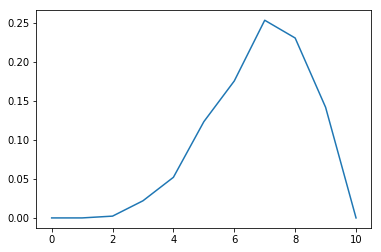

In [56]:
# コインを投げて表が出る確率thetaについての仮説「多分50%くらいじゃない?」を立てる
# ただしthetaは色々考えられるので色々準備する(パラメータの値候補)
theta = np.arange(0.0, 1.1, 0.1)
# p(w) : それぞれのthetaの仮説が採用される確率 (= パラメータの(確率の)事前分布)を仮定する
prior = np.array([0.01, 0.07, 0.1, 0.12, 0.13, 0.14, 0.13, 0.12, 0.1, 0.07, 0.01])
print(theta)
print("prior " + str(prior))

# データを取得する
n, omote = 5, 4

# p(D|w) : 尤度(パラメータをthetaの値候補の中からある値で固定したとき、データがどの程度起こりやすいか)
# ex.) theta=0.5と仮定したとき、「5回中4回表」というデータが得られる確率
# = 成功確率(表が出る確率)がtheta(=0.5)である試行を5回行って4回成功する(表が出る)確率
likelihood = np.array([sum(np.random.binomial(n, theta[i], 1000) == omote)/1000 \
                       for i in range(len(theta))])
print("likelihood " + str(likelihood))

# p(w|D) : 事後分布、このデータのときこのパラメータっぽいのを示すパラメータの確率分布
# ex.) 
# 「5回中4回表が出たデータのとき表が出る確率thetaっていうパラメータが0.1になる確率」、
# 「5回中4回表が出たデータのとき表が出る確率thetaっていうパラメータが0.5になる確率」、 ...
# を集めた確率分布
# 事後分布 = 尤度 * 事前分布
#        = (パラメータ固定したときの観測データの起こりやすさ(正規分布とかから導出)) * (パラメータがその値になりそうな確率についての事前知識、仮説)
posterior = likelihood * prior
print("posterior \n" + str(posterior))
posterior = posterior / np.sum(posterior)
print("posterior regulated \n" + str(sum(posterior)))
plt.plot(posterior)
# パラメータthetaの事後分布。
# = 表の出やすさを表すパラメータthetaの、データ「5回中4回表」を観測したあとの事後分布。
# 「5回中4回表が出た」結果が観測されたあとの パラメータtheta(p(w|D)事後分布)を求めた。
# 「表が出やすいかも?」をよく表す結果になってる。

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

likelihoodArray : 
[0.006 0.013 0.009 0.017 0.017 0.016 0.028 0.042 0.044 0.045 0.057 0.062
 0.076 0.082 0.083 0.069 0.072 0.088 0.068 0.08  0.075 0.079 0.068 0.062
 0.057 0.043 0.028 0.043 0.032 0.02  0.023]
3.565572371126037e-44


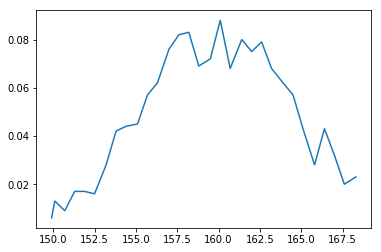

In [110]:
# パラメータが与えられたとき、
mu = 160
sigma = 5
size = 50

# このデータ集合が得られる確率は、
x = np.array([149.9, 150.1, 150.7, 151.3, 151.9, 152.5, 153.2, 153.8,
              154.4, 155.1, 155.7, 156.3, 157.0, 157.6, 158.2, 158.8,
              159.5, 160.1, 160.7, 161.4, 162.0, 162.6, 163.2, 163.9,
              164.5, 165.1, 165.8, 166.4, 167.0, 167.6 , 168.3])
# つまり
# モデルパラメータがこの値のとき、このデータが得られる確率 p(D|w) (尤度) をもとに、
# このデータが得られたあとに、モデルパラメータがこの値になる確率 (p(w|D) 事後確率)を求める。
# データ集合xが得られたあとに、モデルパラメータ mu=160, sigma=5になる確率 (p(w|D) 事後確率)を求める。
# ベイズの公式と同じ流れ。


# p(D|w)とかp(x|mu,sigma) : 「このパラメータのとき、このデータx_n」になる確率 それぞれ一データごと
likelihoodArray = np.array([ sum( np.random.normal(mu, sigma, 1000).round() == x.round()[i] ) / 1000 for i in range(len(x))])
print("likelihoodArray : \n" + str(likelihoodArray))
plt.plot(x, likelihoodArray) # 図1.14の再現
# パラメータmu, sigmaを調整して、このグラフの 各値の積(下で計算してるlikelihood)を 最大化する
# -> 各値の積が最大だったら、尤度関数も最大になる

# データ一つが出現する確率それぞれ の 積 で、データ集合全体の確率に
likelihood = np.prod(likelihoodArray)
print(likelihood) # とても低い。そりゃ、データ集合xにたまたま一致する確率なんて低いよな...w


# ヒストグラムを描画
# plt.hist(normals, 50, normed=True)






